In [11]:
import torch
import torch.nn as nn

In [12]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        l1 = torch.relu(self.fc1(x)) # Layer 1
        o = self.fc2(l1) # Output
        return o
    

In [13]:
model = SimpleNet()

# Fix the weights of the model
model.fc1.weight.data = torch.tensor([[ 0.24,  0.29],[ 0.62, -0.09]])
model.fc1.bias.data = torch.tensor([-0.70, -0.33])

model.fc2.weight.data = torch.tensor([[0.66, 0.70]])
model.fc2.bias.data = torch.tensor([0.29])

In [14]:
input = torch.tensor([[2, 4]], dtype=torch.float32)
output = model(input)
target = torch.tensor([[5]], dtype=torch.float32)
criterion = nn.MSELoss()
loss = criterion(output, target)

In [15]:
print (f"Weights for layer 1: {model.fc1.weight}")
print(f"Bias for layer 1: {model.fc1.bias}")

print (f"Weights for layer 2: {model.fc2.weight}")
print(f"Bias for layer 2: {model.fc2.bias}")

print(f"Loss: {loss}")

Weights for layer 1: Parameter containing:
tensor([[ 0.2400,  0.2900],
        [ 0.6200, -0.0900]], requires_grad=True)
Bias for layer 1: Parameter containing:
tensor([-0.7000, -0.3300], requires_grad=True)
Weights for layer 2: Parameter containing:
tensor([[0.6600, 0.7000]], requires_grad=True)
Bias for layer 2: Parameter containing:
tensor([0.2900], requires_grad=True)
Loss: 13.724061965942383


In [16]:
x1 = torch.tensor(input[0][0].item(), requires_grad=True)
x2 = torch.tensor(input[0][1].item(), requires_grad=True)

label = torch.tensor(target[0][0].item(), requires_grad=True)

w11 = torch.tensor(model.fc1.weight.data[0][0].item(), requires_grad=True)
w12 = torch.tensor(model.fc1.weight.data[0][1].item(), requires_grad=True)

w21 = torch.tensor(model.fc1.weight.data[1][0].item(), requires_grad=True)
w22 = torch.tensor(model.fc1.weight.data[1][1].item(), requires_grad=True)

b1 = torch.tensor(model.fc1.bias.data[0].item(), requires_grad=True)
b2 = torch.tensor(model.fc1.bias.data[1].item(), requires_grad=True)

w31 = torch.tensor(model.fc2.weight.data[0][0].item(), requires_grad=True)
w32 = torch.tensor(model.fc2.weight.data[0][1].item(), requires_grad=True)

b3 = torch.tensor(model.fc2.bias.data[0].item(), requires_grad=True)

# Activation of neuron 1 for layer 1
l1_n1 = torch.relu(w11 * x1 + w12 * x2)
l1_n1.retain_grad()
print(f"Activation of neuron 1 for layer 1 (without bias): {l1_n1}")
l1_n1_bias = torch.relu(l1_n1 + b1)
l1_n1_bias.retain_grad()
print(f"Activation of neuron 1 for layer 1 (with bias): {l1_n1_bias}")

# Activation of neuron 2 for layer 1
l1_n2 = torch.relu(w21 * x1 + w22 * x2)
l1_n2.retain_grad()
print(f"Activation of neuron 2 for layer 1 (without bias): {l1_n2}")
l1_n2_bias = torch.relu(l1_n2 + b2)
l1_n2_bias.retain_grad()
print(f"Activation of neuron 2 for layer 1 (with bias): {l1_n2_bias}")

# Activation of neuron 1 for layer 2
l2_n1 = (w31 * l1_n1 + w32 * l1_n2)
l2_n1.retain_grad()
print(f"Activation of neuron 1 for layer 2 (without bias): {l2_n1}")
l2_n1_bias = (l2_n1 + b3)
l2_n1_bias.retain_grad()
print(f"Activation of neuron 1 for layer 2 (with bias): {l2_n1_bias}")

# Loss calculation
loss = (l2_n1_bias - label) ** 2
loss.retain_grad()
print(f"Loss: {loss}")

loss.backward()

print(f"Gradient of loss w.r.t. x1: {w11.grad}")

Activation of neuron 1 for layer 1 (without bias): 1.6399999856948853
Activation of neuron 1 for layer 1 (with bias): 0.9399999976158142
Activation of neuron 2 for layer 1 (without bias): 0.8799999952316284
Activation of neuron 2 for layer 1 (with bias): 0.5499999523162842
Activation of neuron 1 for layer 2 (without bias): 1.6984000205993652
Activation of neuron 1 for layer 2 (with bias): 1.9883999824523926
Loss: 9.069734573364258
Gradient of loss w.r.t. x1: -7.950624465942383


In [17]:
# Print activations for layer 1
print(f"Activations for layer 1: {torch.relu(model.fc1(input))}")

# Print activations for layer 2
print(f"Activations for layer 2: {(model.fc2(torch.relu(model.fc1(input))))}")

Activations for layer 1: tensor([[0.9400, 0.5500]], grad_fn=<ReluBackward0>)
Activations for layer 2: tensor([[1.2954]], grad_fn=<AddmmBackward0>)


In [18]:
from torchviz import make_dot

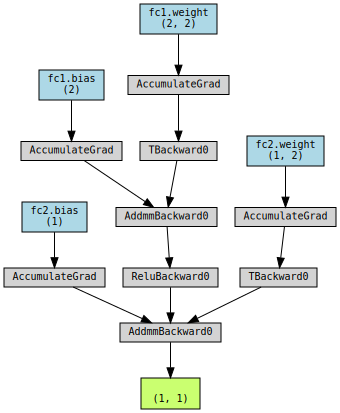

In [19]:
# Visualize the model
make_dot(output, params=dict(model.named_parameters()))
